In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [4]:
data = pd.read_csv('new_file_sampled.csv', header=None)

In [5]:
columns = ['target'] + [f'feature_{i}' for i in range(1, 29)]
data.columns = columns

In [6]:
print(data.columns)


Index(['target', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28'],
      dtype='object')


In [7]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      1001 non-null   object
 1   feature_1   1001 non-null   object
 2   feature_2   1001 non-null   object
 3   feature_3   1001 non-null   object
 4   feature_4   1001 non-null   object
 5   feature_5   1001 non-null   object
 6   feature_6   1001 non-null   object
 7   feature_7   1001 non-null   object
 8   feature_8   1001 non-null   object
 9   feature_9   1001 non-null   object
 10  feature_10  1001 non-null   object
 11  feature_11  1001 non-null   object
 12  feature_12  1001 non-null   object
 13  feature_13  1001 non-null   object
 14  feature_14  1001 non-null   object
 15  feature_15  1001 non-null   object
 16  feature_16  1001 non-null   object
 17  feature_17  1001 non-null   object
 18  feature_18  1001 non-null   object
 19  feature_19  1001 non-null   object

In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
target        0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
dtype: int64


In [9]:
# Analyze the target distribution
print("\nTarget distribution (Signal=1, Background=0):")
print(data['target'].value_counts(normalize=True))


Target distribution (Signal=1, Background=0):
target
1           0.506494
0           0.492507
Column 1    0.000999
Name: proportion, dtype: float64


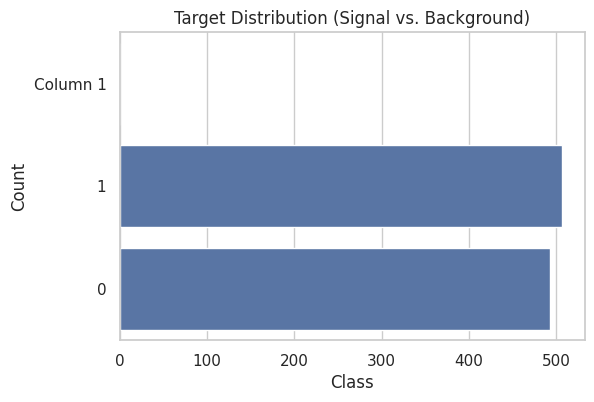

In [10]:
# Plot target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['target'])
plt.title('Target Distribution (Signal vs. Background)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

target        object
feature_1     object
feature_2     object
feature_3     object
feature_4     object
feature_5     object
feature_6     object
feature_7     object
feature_8     object
feature_9     object
feature_10    object
feature_11    object
feature_12    object
feature_13    object
feature_14    object
feature_15    object
feature_16    object
feature_17    object
feature_18    object
feature_19    object
feature_20    object
feature_21    object
feature_22    object
feature_23    object
feature_24    object
feature_25    object
feature_26    object
feature_27    object
feature_28    object
dtype: object


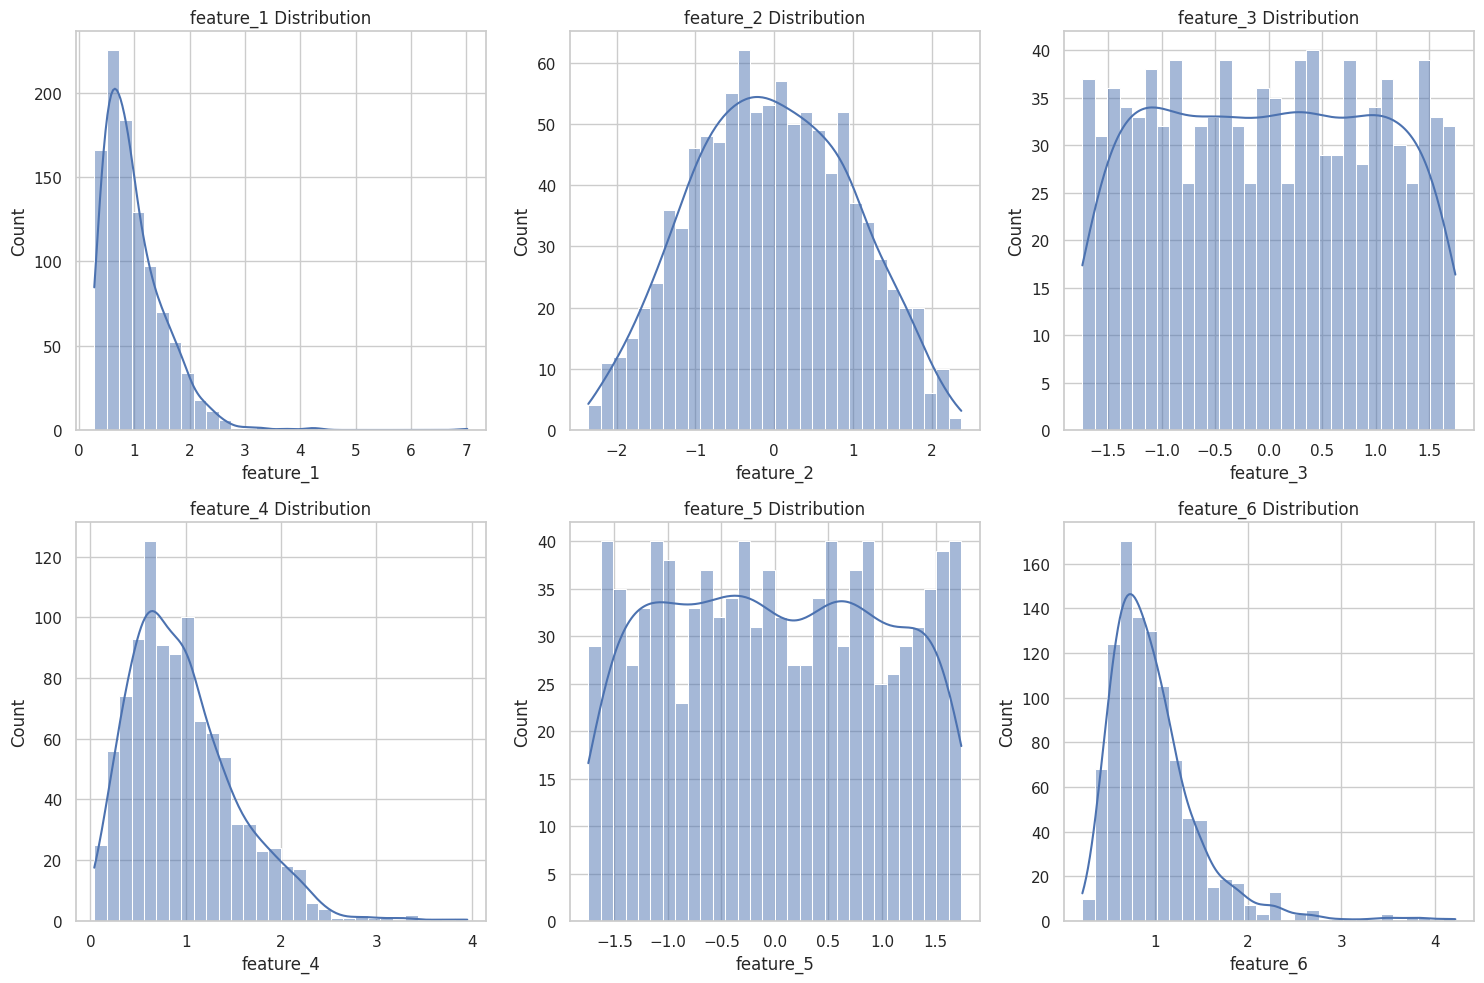

In [11]:
# Step 1: Check and display data types to confirm all features are numeric
print(data.dtypes)

# Step 2: Ensure all feature columns are numeric
for feature in data.columns[1:]:  # Skip the target column
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Step 3: Plotting distribution of a few selected features
import matplotlib.pyplot as plt
import seaborn as sns

sample_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5','feature_6']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(sample_features, 1):
    if feature in data.columns:
        plt.subplot(2, 3, i)
        # Drop any NaN values in the feature column
        sns.histplot(data[feature].dropna(), kde=True, bins=30)
        plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


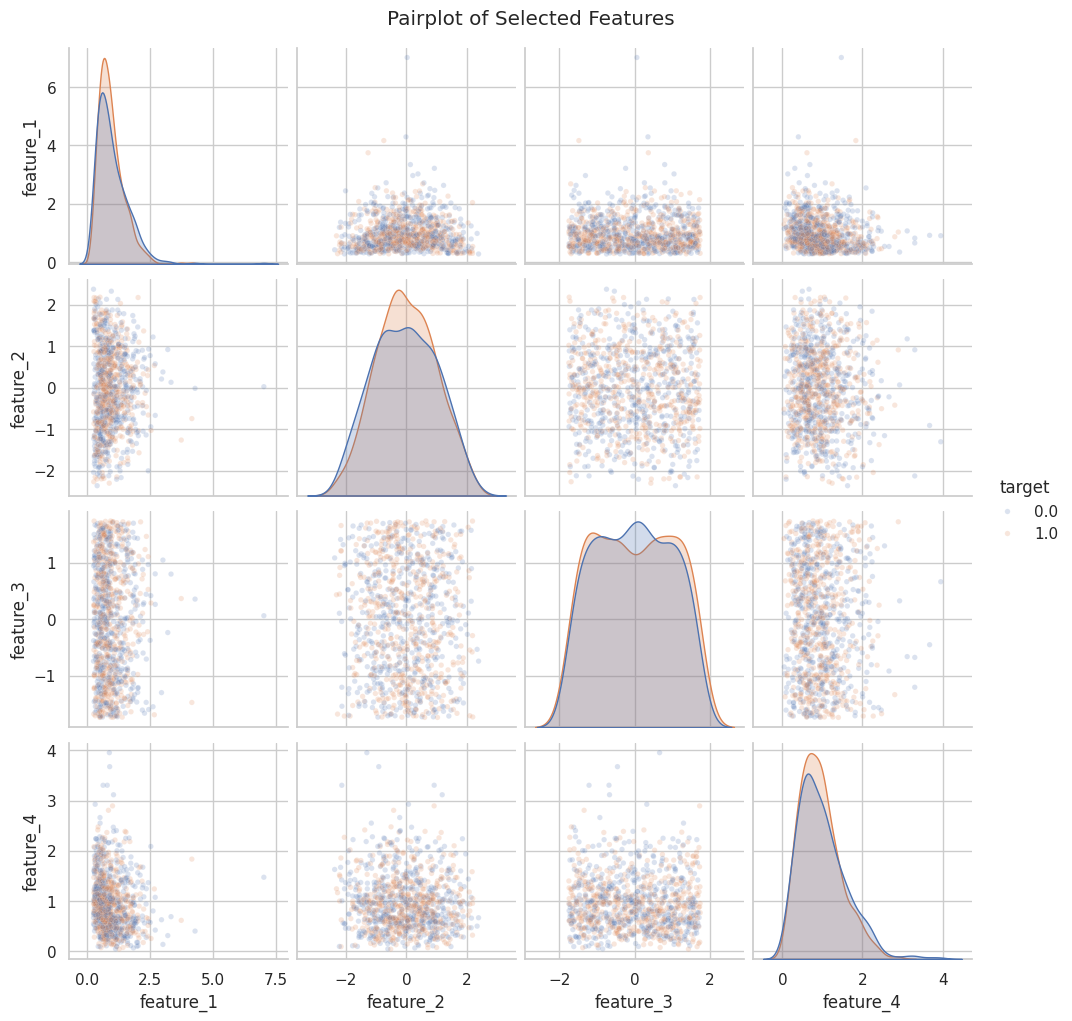

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure selected columns are numeric and handle errors by coercing non-numeric values to NaN
selected_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'target']
for feature in selected_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Step 2: Drop rows with NaN values in the selected columns
data_pairplot = data[selected_features].dropna()

# Step 3: Create the pairplot
sns.pairplot(data_pairplot, hue='target', plot_kws={'alpha': 0.2, 's': 15})
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


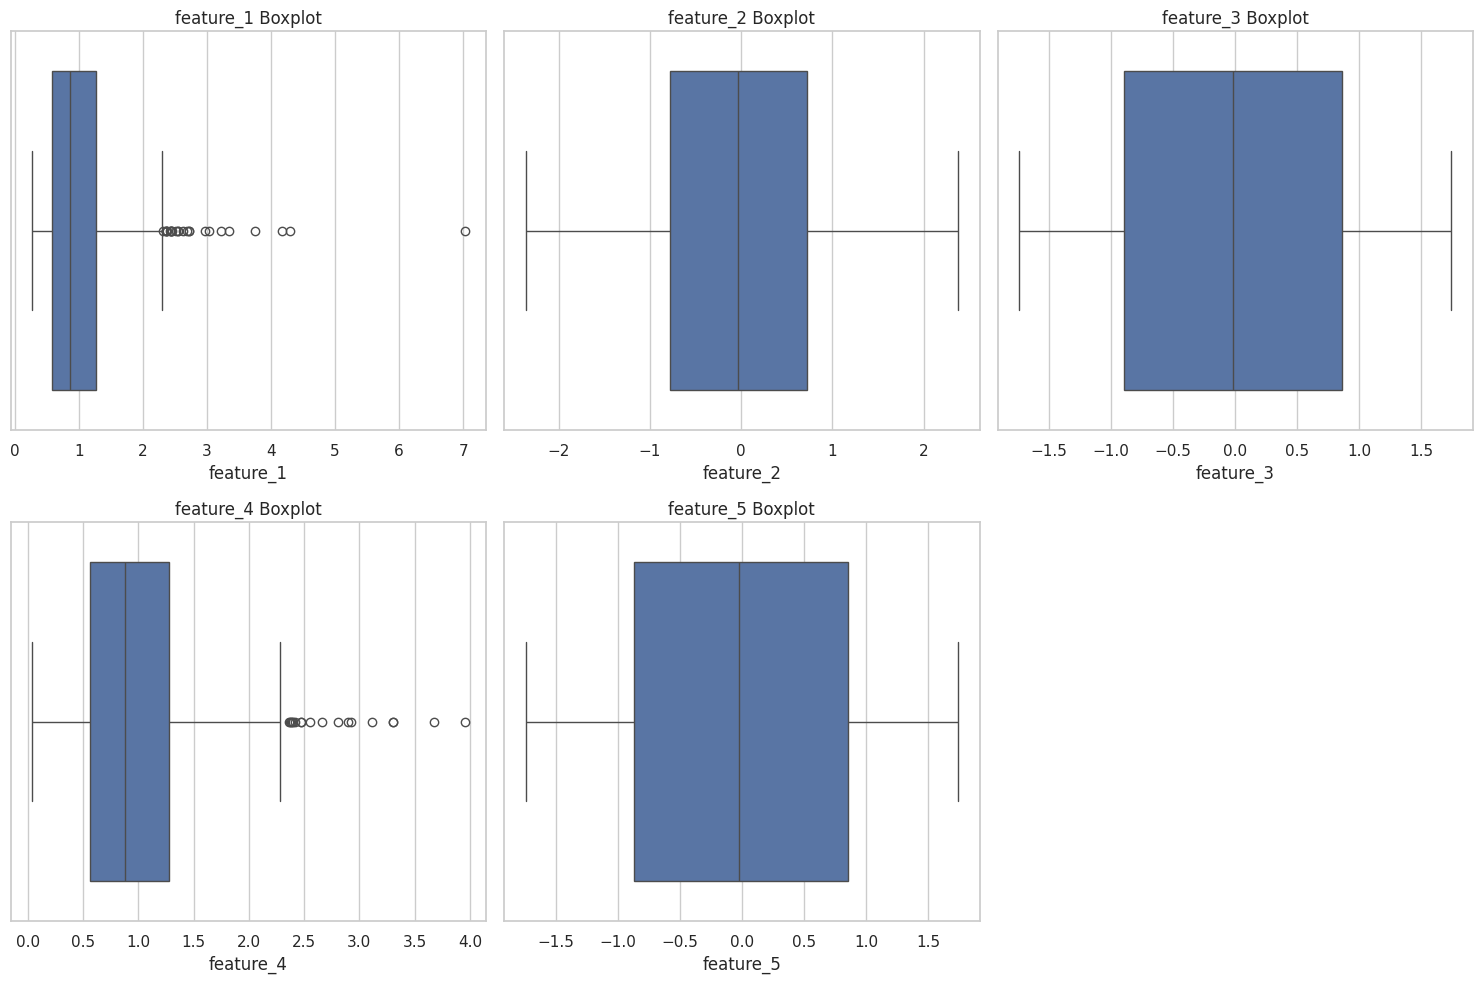

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample features to plot
sample_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']

# Ensure selected features are numeric
for feature in sample_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Drop rows with NaN values in any of the sample features
data_boxplot = data.dropna(subset=sample_features)

# Plot boxplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(sample_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data_boxplot, x=feature)
    plt.title(f'{feature} Boxplot')
plt.tight_layout()
plt.show()


Summary of standardized features:
          feature_1     feature_2     feature_3     feature_4     feature_5  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.012523e-16  1.065814e-17 -3.508305e-17 -1.740830e-16 -4.352074e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.239760e+00 -2.325576e+00 -1.710135e+00 -1.656035e+00 -1.720220e+00   
25%   -7.128705e-01 -7.462796e-01 -8.719993e-01 -7.180083e-01 -8.616900e-01   
50%   -2.265167e-01 -3.467607e-03 -1.434716e-03 -1.623122e-01 -2.889101e-02   
75%    4.768705e-01  7.529695e-01  8.660691e-01  5.517764e-01  8.440782e-01   
max    1.038667e+01  2.404284e+00  1.741440e+00  5.339056e+00  1.715465e+00   

          feature_6     feature_7     feature_8     feature_9    feature_10  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   3.197442e-17  1.065814e-17  3.907985e-17  7.904788e-17 -1.243450e-16   
std    1.000500e+

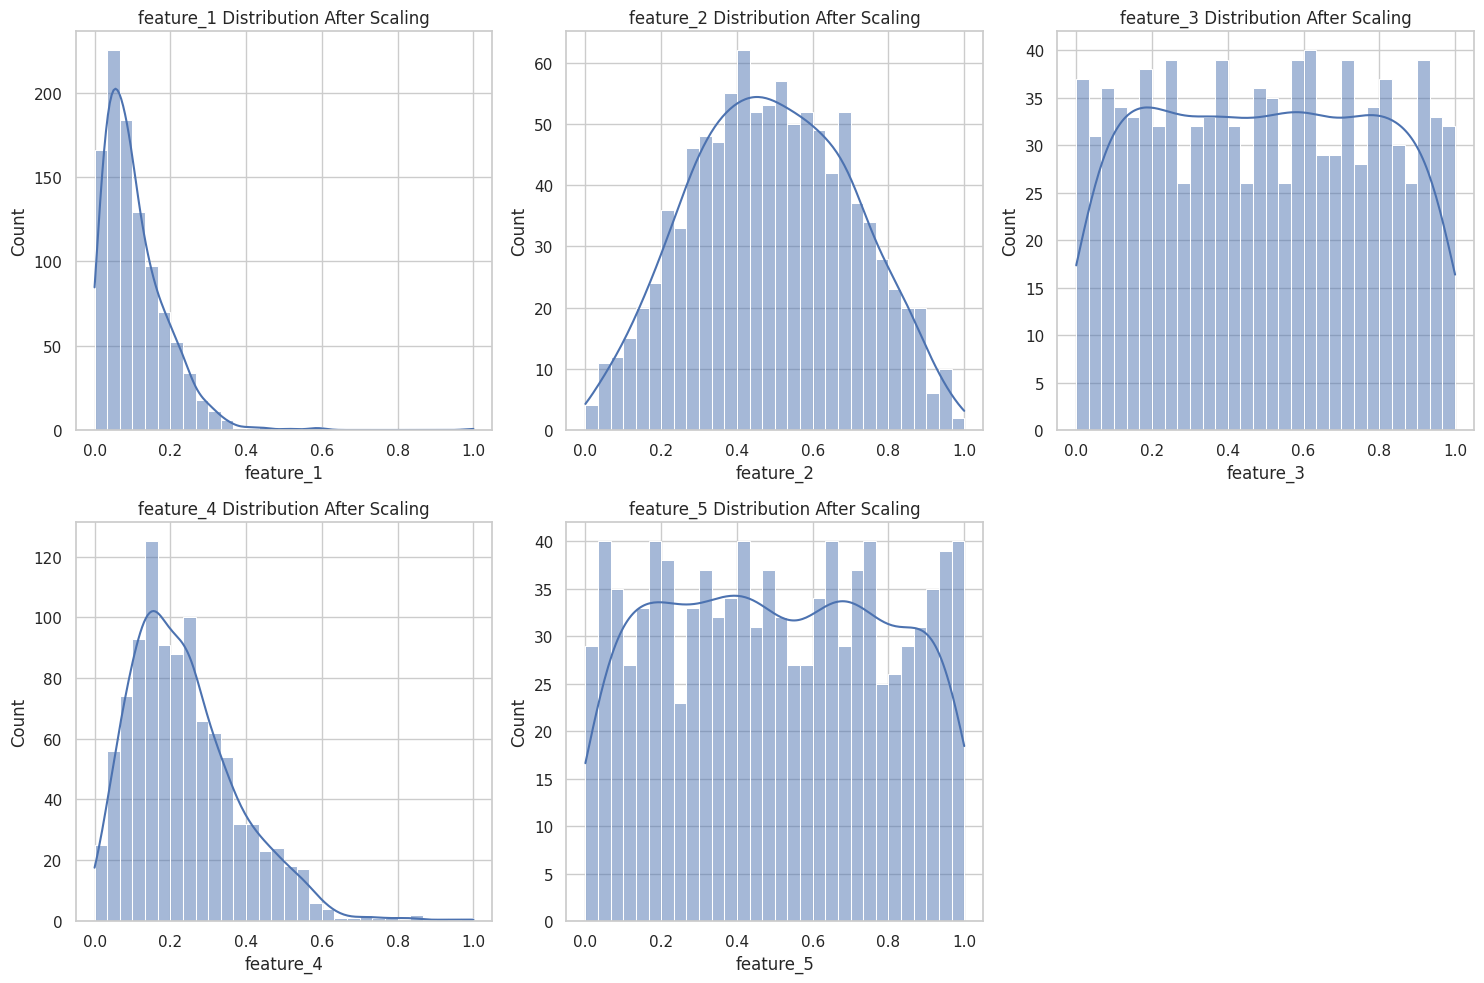

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the feature columns (excluding the target)
feature_columns = [f'feature_{i}' for i in range(1, 29)]

# Step 1: Standardization
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Display a summary of standardized features
print("Summary of standardized features:")
print(data[feature_columns].describe())

# Step 2: Min-Max Scaling
scaler = MinMaxScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

print("\nFirst few rows after Standardization:")
print(data.head())

# Plot a few features to confirm scaling visually
import matplotlib.pyplot as plt
import seaborn as sns

sample_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(sample_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution After Scaling')
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Define the feature columns (excluding the target)
feature_columns = [f'feature_{i}' for i in range(1, 29)]
X = data[feature_columns]
y = data['target']

# Step 1: Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Generate Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_imputed)

# Convert polynomial features into a DataFrame for easier viewing
poly_feature_names = poly.get_feature_names_out(feature_columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Step 3: Apply Log Transformation on Select Features (to reduce skewness)
# Apply log transformation to positively skewed features
X_transformed = pd.DataFrame(X_imputed, columns=feature_columns)
for feature in feature_columns:
    X_transformed[f'log_{feature}'] = np.log1p(X_transformed[feature])

# Combine original, polynomial, and log-transformed features into one dataset
data_engineered = pd.concat([X, X_poly_df, X_transformed], axis=1)
data_engineered['target'] = y

# Display the shape of the new dataset
print("Shape of data after feature engineering:", data_engineered.shape)

# Display a few rows of the new dataset
print("\nFirst few rows after feature engineering:")
print(data_engineered.head())


Shape of data after feature engineering: (1001, 519)

First few rows after feature engineering:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1   0.038094   0.379218   0.296966   0.164149   0.701887   0.460186   
2   0.009741   0.512963   0.593324   0.737483   0.643903   0.426423   
3   0.221294   0.450617   0.116875   0.342922   0.562853   0.061291   
4   0.065390   0.329218   0.142512   0.155211   0.779531   0.093770   

   feature_7  feature_8  feature_9  feature_10  ...  log_feature_20  \
0        NaN        NaN        NaN         NaN  ...        0.403856   
1   0.288566   0.508563        0.0    0.292054  ...        0.104401   
2   0.363329   0.124936        1.0    0.169548  ...        0.626389   
3   0.403924   0.692772        0.0    0.105946  ...        0.653514   
4   0.620433   0.971881        0.0    0.193145  ...        0.564318   

   log_feature_21  log_feature_22  log_feature_23 

In [16]:
# Check for NaN values in the features
print("Number of NaN values in features:\n", X.isna().sum())

# Drop rows where any feature or target is NaN
data_cleaned = data_engineered.dropna()

# Define the feature columns again after cleaning
X = data_cleaned[feature_columns]
y = data_cleaned['target']

# Check for NaN values in the cleaned dataset
print("Number of NaN values in target variable after cleaning:", y.isna().sum())
print("Number of NaN values in features after cleaning:\n", X.isna().sum())

# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Feature Selection using RFE
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=10)  # Select the top 10 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features_rfe)

# Step 4: Feature Selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Select the top 10 features based on ANOVA F-value
selector.fit(X_train, y_train)

# Get the selected features
selected_features_kbest = X.columns[selector.get_support()]
print("Selected features using SelectKBest:", selected_features_kbest)

# Optional: Combine selected features into a new dataset for model training
selected_features_combined = list(set(selected_features_rfe) | set(selected_features_kbest))
X_selected = X[selected_features_combined]

# Display the shape of the new dataset
print("Shape of dataset after feature selection:", X_selected.shape)


Number of NaN values in features:
 feature_1     1
feature_2     1
feature_3     1
feature_4     1
feature_5     1
feature_6     1
feature_7     1
feature_8     1
feature_9     1
feature_10    1
feature_11    1
feature_12    1
feature_13    1
feature_14    1
feature_15    1
feature_16    1
feature_17    1
feature_18    1
feature_19    1
feature_20    1
feature_21    1
feature_22    1
feature_23    1
feature_24    1
feature_25    1
feature_26    1
feature_27    1
feature_28    1
dtype: int64
Number of NaN values in target variable after cleaning: 0
Number of NaN values in features after cleaning:
 feature_1     0
feature_1     0
feature_1     0
feature_2     0
feature_2     0
             ..
feature_27    0
feature_27    0
feature_28    0
feature_28    0
feature_28    0
Length: 84, dtype: int64
Selected features using RFE: Index(['feature_1', 'feature_1', 'feature_4', 'feature_6', 'feature_6',
       'feature_23', 'feature_26', 'feature_26', 'feature_28', 'feature_28'],
      dtype='obj

In [17]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Create the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(svm_model, X_selected, y, cv=5)  # Using 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Fit the model to the entire dataset for a final evaluation
svm_model.fit(X_selected, y)

# Make predictions
y_pred = svm_model.predict(X_selected)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


Cross-validation scores: [0.54  0.56  0.56  0.615 0.555]
Mean CV score: 0.5660000000000001
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.48      0.53       493
         1.0       0.58      0.69      0.63       507

    accuracy                           0.58      1000
   macro avg       0.59      0.58      0.58      1000
weighted avg       0.59      0.58      0.58      1000

Confusion Matrix:
 [[235 258]
 [157 350]]


Key Classification Metrics:
Accuracy: 0.5850
Precision: 0.5757
Recall: 0.6903
F1 Score: 0.6278
AUC: 0.6314


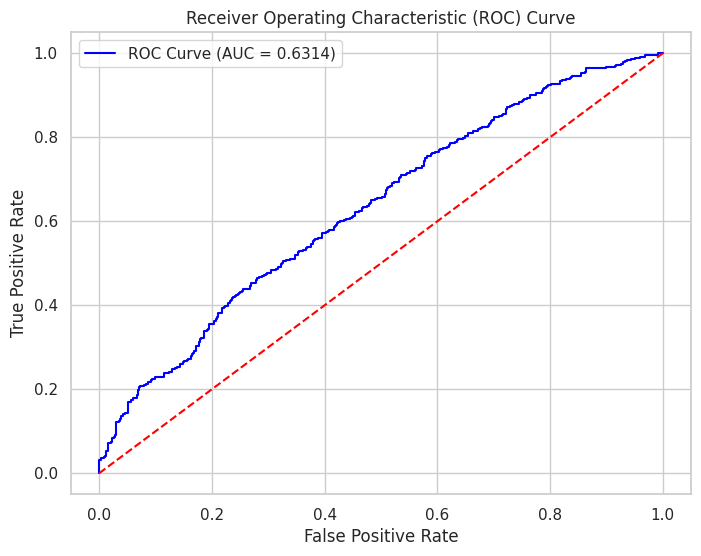

In [18]:
# Import additional necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = svm_model.predict(X_selected)

# Calculate the probabilities for AUC
y_prob = svm_model.decision_function(X_selected)  # Use decision_function for SVM
y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize probabilities to [0, 1]

# Calculate key classification metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
auc = roc_auc_score(y, y_prob)

# Print the metrics
print("Key Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and test sets (use the previously selected features)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Create an SGD Classifier for SVM
sgd_svm = SGDClassifier(loss='hinge',  # 'hinge' loss for linear SVM
                        max_iter=1000,
                        tol=1e-3,
                        random_state=42)

# Optionally create a pipeline for scaling
pipeline = make_pipeline(StandardScaler(), sgd_svm)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.60      0.58       161
         1.0       0.49      0.45      0.47       139

    accuracy                           0.53       300
   macro avg       0.53      0.52      0.52       300
weighted avg       0.53      0.53      0.53       300

Confusion Matrix:
 [[96 65]
 [76 63]]


In [20]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_selected and y are defined and properly formatted

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Function to evaluate the model
def evaluate_model(model):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 1. Polynomial Kernel
print("Polynomial Kernel Results:")
for degree in [2, 3, 4]:
    print(f"\nDegree: {degree}")
    poly_svm = SVC(kernel='poly', degree=degree, random_state=42)
    poly_svm.fit(X_train, y_train)
    evaluate_model(poly_svm)

# 2. RBF Kernel
print("\nRBF Kernel Results:")
gamma_values = [0.1, 1, 10]  # You can adjust these values for tuning
for gamma in gamma_values:
    print(f"\nGamma: {gamma}")
    rbf_svm = SVC(kernel='rbf', gamma=gamma, random_state=42)
    rbf_svm.fit(X_train, y_train)
    evaluate_model(rbf_svm)

# 3. Custom Kernel - Sigmoid Kernel
def sigmoid_kernel(X, Y):
    return np.tanh(np.dot(X, Y.T))

print("\nCustom Sigmoid Kernel Results:")
sigmoid_svm = SVC(kernel=sigmoid_kernel)
sigmoid_svm.fit(X_train, y_train)
evaluate_model(sigmoid_svm)




Polynomial Kernel Results:

Degree: 2
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.35      0.47       161
         1.0       0.52      0.81      0.63       139

    accuracy                           0.57       300
   macro avg       0.60      0.58      0.55       300
weighted avg       0.61      0.57      0.54       300

Confusion Matrix:
 [[ 57 104]
 [ 26 113]]

Degree: 3
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.25      0.35       161
         1.0       0.48      0.81      0.60       139

    accuracy                           0.51       300
   macro avg       0.54      0.53      0.48       300
weighted avg       0.54      0.51      0.47       300

Confusion Matrix:
 [[ 40 121]
 [ 27 112]]

Degree: 4
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.26      0.37       161
         1.0       0.

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

# Define the parameter grid for tuning C
param_grid = {
    'C': [0.1, 1, 10, 100, 1000]
}

# Function to perform Grid Search for a given SVM model and parameters
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# 1. Tune Polynomial Kernel
print("Tuning Polynomial Kernel:")
poly_svm = SVC(kernel='poly', degree=2, random_state=42)
best_poly_svm, best_poly_params = tune_model(poly_svm, param_grid, X_train, y_train)
print(f"Best Parameters for Polynomial Kernel: {best_poly_params}")

# Evaluate the best model
evaluate_model(best_poly_svm)

# 2. Tune RBF Kernel
print("\nTuning RBF Kernel:")
rbf_svm = SVC(kernel='rbf', random_state=42)
best_rbf_svm, best_rbf_params = tune_model(rbf_svm, param_grid, X_train, y_train)
print(f"Best Parameters for RBF Kernel: {best_rbf_params}")

# Evaluate the best model
evaluate_model(best_rbf_svm)

# 3. Tune Custom Sigmoid Kernel
print("\nTuning Custom Sigmoid Kernel:")
sigmoid_svm = SVC(kernel=sigmoid_kernel)
best_sigmoid_svm, best_sigmoid_params = tune_model(sigmoid_svm, param_grid, X_train, y_train)
print(f"Best Parameters for Custom Sigmoid Kernel: {best_sigmoid_params}")

# Evaluate the best model
evaluate_model(best_sigmoid_svm)




Tuning Polynomial Kernel:
Best Parameters for Polynomial Kernel: {'C': 10}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.38      0.49       161
         1.0       0.52      0.79      0.63       139

    accuracy                           0.57       300
   macro avg       0.60      0.59      0.56       300
weighted avg       0.61      0.57      0.55       300

Confusion Matrix:
 [[ 61 100]
 [ 29 110]]

Tuning RBF Kernel:
Best Parameters for RBF Kernel: {'C': 1}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.47      0.54       161
         1.0       0.53      0.68      0.60       139

    accuracy                           0.57       300
   macro avg       0.58      0.58      0.57       300
weighted avg       0.58      0.57      0.57       300

Confusion Matrix:
 [[76 85]
 [44 95]]

Tuning Custom Sigmoid Kernel:
Best Parameters for Custom Sigmoid Kernel: {'C': 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from sklearn.metrics import roc_auc_score
import time

# Function to evaluate the model and collect metrics
def evaluate_and_collect_metrics(model):
    start_time = time.time()  # Start timer
    y_pred = model.predict(X_test)
    y_pred_proba = model.decision_function(X_test)  # Get decision function for AUC
    elapsed_time = time.time() - start_time  # Time taken to predict

    # Calculate metrics
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'time_taken': elapsed_time
    }

# Store results for each kernel
results = {}

# Evaluate best models for each kernel
for kernel_name, best_model in zip(['Polynomial', 'RBF', 'Custom Sigmoid'],
                                    [best_poly_svm, best_rbf_svm, best_sigmoid_svm]):
    print(f"\nEvaluating {kernel_name} Kernel:")
    metrics = evaluate_and_collect_metrics(best_model)
    results[kernel_name] = metrics
    print(f"Results for {kernel_name} Kernel:")
    print(metrics)

# Comparing results
comparison_df = pd.DataFrame(results).T
print("\nPerformance Comparison:")
print(comparison_df)



Evaluating Polynomial Kernel:
Results for Polynomial Kernel:
{'accuracy': 0.57, 'precision': 0.5238095238095238, 'recall': 0.7913669064748201, 'f1_score': 0.6303724928366762, 'auc': 0.6465883194065866, 'time_taken': 0.009463310241699219}

Evaluating RBF Kernel:
Results for RBF Kernel:
{'accuracy': 0.57, 'precision': 0.5277777777777778, 'recall': 0.6834532374100719, 'f1_score': 0.5956112852664577, 'auc': 0.6392600205549847, 'time_taken': 0.0194852352142334}

Evaluating Custom Sigmoid Kernel:
Results for Custom Sigmoid Kernel:
{'accuracy': 0.4633333333333333, 'precision': 0.4633333333333333, 'recall': 1.0, 'f1_score': 0.6332574031890661, 'auc': 0.5128021806157559, 'time_taken': 0.008852243423461914}

Performance Comparison:
                accuracy  precision    recall  f1_score       auc  time_taken
Polynomial      0.570000   0.523810  0.791367  0.630372  0.646588    0.009463
RBF             0.570000   0.527778  0.683453  0.595611  0.639260    0.019485
Custom Sigmoid  0.463333   0.4633

In [23]:
pip install scikit-learn scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

# Define the parameter grid for Random Search
param_distributions = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
    'degree': [2, 3, 4],  # Polynomial degrees
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))  # RBF and polynomial gamma values
}

# Initialize the SVC model
svc = SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svc, param_distributions, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit to the training data
random_search.fit(X_train, y_train)

# Best parameters and score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Random Search Best Parameters:", best_params_random)
print("Random Search Best Score:", best_score_random)


In [ ]:
from skopt import BayesSearchCV

# Define the search space
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
    'degree': (2, 4),  # Polynomial degrees
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))  # Gamma values for RBF and polynomial kernels
}

# Initialize the Bayesian optimization search
bayes_search = BayesSearchCV(svc, search_space, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit to the training data
bayes_search.fit(X_train, y_train)

# Best parameters and score
best_params_bayes = bayes_search.best_params_
best_score_bayes = bayes_search.best_score_

print("Bayesian Optimization Best Parameters:", best_params_bayes)
print("Bayesian Optimization Best Score:", best_score_bayes)


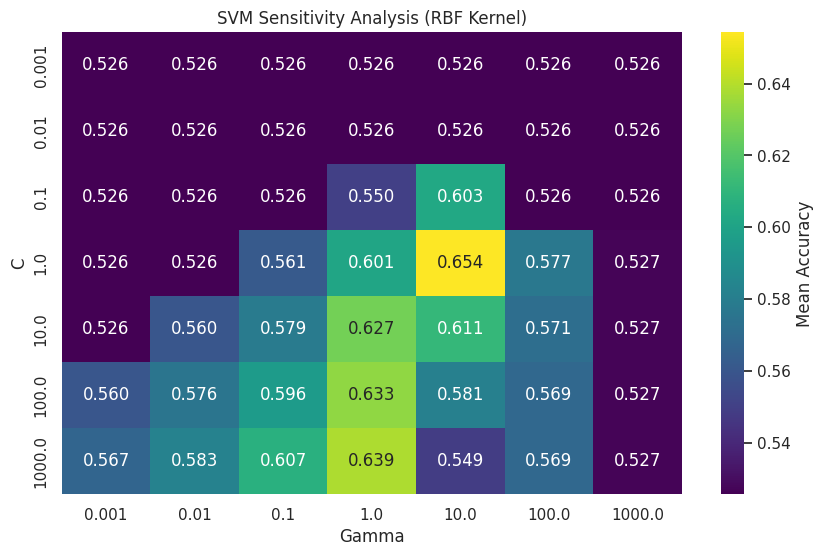

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'gamma': np.logspace(-3, 3, 7),  # RBF gamma values
}

# Initialize an SVC model
svc_rbf = SVC(kernel='rbf')

# Initialize GridSearchCV
grid_search = GridSearchCV(svc_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Extract results
results = grid_search.cv_results_

# Reshape results for heatmap
mean_scores = results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Create a heatmap for C vs. gamma
plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores, annot=True, fmt='.3f', xticklabels=np.round(param_grid['gamma'], 3),
            yticklabels=np.round(param_grid['C'], 3), cmap='viridis', cbar_kws={'label': 'Mean Accuracy'})
plt.title('SVM Sensitivity Analysis (RBF Kernel)')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()


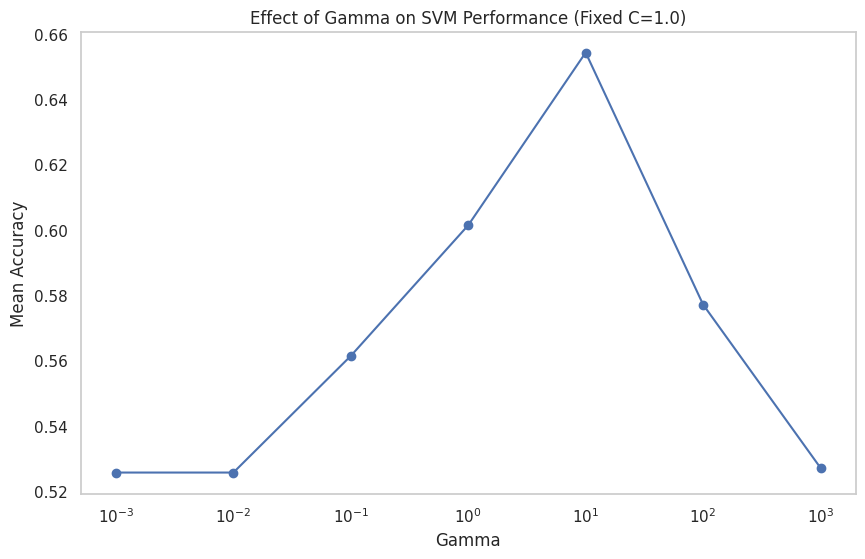

In [25]:
# Plotting performance of SVM with varying gamma and fixed C
fixed_C = 1.0
gamma_scores = []

for gamma in param_grid['gamma']:
    svc = SVC(kernel='rbf', C=fixed_C, gamma=gamma)
    scores = cross_val_score(svc, X_train, y_train, cv=5)
    gamma_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(param_grid['gamma'], gamma_scores, marker='o')
plt.xscale('log')
plt.title('Effect of Gamma on SVM Performance (Fixed C=1.0)')
plt.xlabel('Gamma')
plt.ylabel('Mean Accuracy')
plt.grid()
plt.show()


In [26]:
pip install shap


  0%|          | 0/700 [00:00<?, ?it/s]

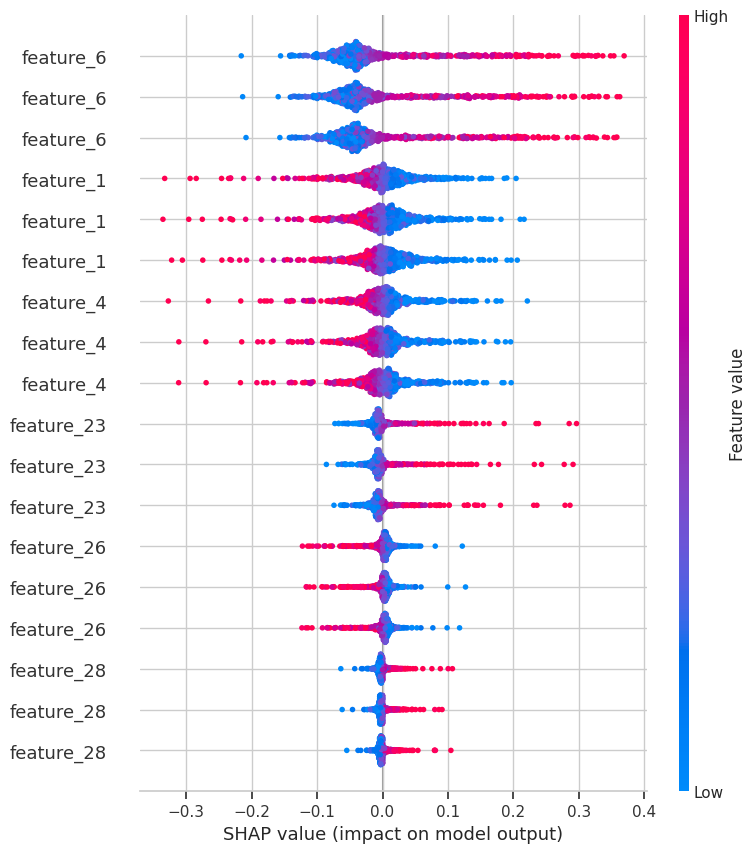

In [27]:
import shap


# Create a SHAP explainer for the RBF model (or whichever model you are using)
explainer = shap.KernelExplainer(sgd_svm.predict, X_train)

# Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Create a summary plot of the SHAP values
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns.tolist())
